## Daten aus API einlesen
Diesdasananas

Api Dokumentation gemäss: https://doc.iofrog.com/apidocumentation/api.html
Postman requests: https://www.getpostman.com/collections/eb80441a4500fd9a0634

In [1]:
# packages import
import requests
import json
import pandas as pd


Login to api

In [2]:
url = "https://www.iofrog.com/api/v2/auth/signin/"

payload = json.dumps({
  "username": "pascal.berger@students.fhnw.ch",
  "password": "123321"
})
headers = {
  'Content-Type': 'application/json',
  'Cookie': ''
}

login_response = requests.request("POST", url, headers=headers, data=payload)
#print(login_response.text)


In [3]:
login_data = pd.read_json(login_response.text)
access_token = login_data.loc['accessToken', 'token']
login_data

,user,token
firstName,Pascal,NaN
lastName,Berger,NaN
isActivated,True,NaN
level,expert,NaN
partner,heliot,NaN
lang,en,NaN
timeZone,Europe/Berlin,NaN
units,"{'temperature': 'C', 'system': 'M'}",NaN
accessToken,NaN,eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpZCI6I...
refreshToken,NaN,60798966d131ef466438a253.a867b960b1e718ce15366...


get devices data

In [4]:
url = "https://www.iofrog.com/api/v2/devices/dashboard"

payload = json.dumps([
  {
    "data": [],
    "count": 2,
    "meta": {}
  }
])
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

devices_response = requests.request("GET", url, headers=headers, data=payload)
#print(devices_response.text)


In [5]:
#print(devices_response.text)
#device_data = pd.read_json(devices_response.text)

device_dict = json.loads(devices_response.text)
device_data = pd.DataFrame.from_dict(device_dict['data'])
#device_data = pd.json_normalize(device_dict)
#device_dict['data']
device_data

,id,groupId,name,typeId,modeId,downlinkData,active,location,viewConfig,status,subscriptions,lastDataMessages,trackedKeys,badges,lastDataMessage,lastSourceBasedLocation
0,2203AF9,60476e95362d421c28ee0058,SimplePack POC_02203AF9 TeamA,simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050c0467d354e09ee4aa73e', 'provider...","[{'_id': '607906bc4568aa5ea543c9e0', 'keys': [...",[],[],"{'_id': '607906bc4568aa5ea543c9e0', 'keys': [{...",NaN
1,1F2504E,60476e95362d421c28ee0058,Türe Beschleunigung (PTH-04E),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'atlas', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '6050bd897d354e09ee4a5d37', 'provider...","[{'_id': '6079876f1ef743213d96b3ac', 'keys': [...",[],[],"{'_id': '6079876f1ef743213d96b3ac', 'keys': [{...",NaN
2,2203AFA,60476e95362d421c28ee0058,Türe Magnet aussen (POC-AFA),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489ad5362d421c28f49667', 'provider...","[{'_id': '60793e43100aad2989c9ebba', 'keys': [...",[],[],"{'_id': '60793e43100aad2989c9ebba', 'keys': [{...","{'geoplaces': [], '_id': '605b4291f4e46133dc9b..."
3,2203AAB,60476e95362d421c28ee0058,Türe Magnet innen (POC-AAB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489bab362d421c28f49a02', 'provider...","[{'_id': '607983f6d131ef466437b4da', 'keys': [...",[],[],"{'_id': '607983f6d131ef466437b4da', 'keys': [{...","{'geoplaces': [], '_id': '6059fbafb3ae30315afb..."
4,1F25047,60476e95362d421c28ee0058,Türriegel Beschl. (PTH-047),simple_pack_plus_full_3_0_6_0,put_me_back,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489b3f362d421c28f498b2', 'provider...","[{'_id': '607987701ef743213d96b404', 'keys': [...",[],[],"{'_id': '607987701ef743213d96b404', 'keys': [{...","{'geoplaces': [], '_id': '6058b9d703380b4c4fd1..."
5,2203ACB,60476e95362d421c28ee0058,Türriegel Magnet (POC-ACB),simple_pack_plus_full_3_0_6_0,reed_counter,,True,"{'lat': None, 'lng': None}","{'locationSource': 'fallback', 'view': 'last'}","{'isRegistered': True, 'isReadyForActivation':...","[{'_id': '60489995362d421c28f48edd', 'provider...","[{'_id': '60797e661ef743213d9534cd', 'keys': [...",[],[],"{'_id': '60797e661ef743213d9534cd', 'keys': [{...","{'geoplaces': [], '_id': '605b68f2f4e46133dc9e..."


In [6]:
url = "https://www.iofrog.com/api/v2/devices/2203AAB/messages/"

payload = json.dumps({
  "data": [
    {
      "_id": "1f704bc5-5055-43eb-a851-c87b6b0bf7b9",
      "isAlarm": False,
      "isDismissed": False,
      "timestamp": 1584093653,
      "type": "data_uplink",
      "seqNumber": 1,
      "keys": [
        {
          "isCode": False,
          "_id": "1111111111111111111111",
          "key": "key",
          "value": "value",
          "keyLocale": "Klíč",
          "valueLocale": "Hodnota",
          "color": "alarm",
          "icon": "icon name (from fontAwesome)"
        }
      ]
    }
  ],
  "count": 1
})
headers = {
  'Authorization': 'Bearer ' + access_token,
  'Content-Type': 'application/json',
  'Cookie': ''
}

message_response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)


In [7]:
# data prep


message_dict = json.loads(message_response.text)
#print(message_dict['data'])
message_data = pd.DataFrame.from_dict(message_dict['data'])

message_data = message_data.drop(columns=['keys'])

message_data_keys = pd.json_normalize(message_dict['data'], record_path='keys', record_prefix='keys_', meta='_id')
message_data_keys = message_data_keys.pivot(index=['_id'], columns='keys_key', values='keys_value')
message_data_keys.reset_index(inplace=True)
message_data_keys = message_data_keys.groupby('_id').sum()
#print(message_data_keys)
# join df's
message_data = message_data.merge(message_data_keys, on=['_id'], how='left', indicator=True)

message_data



,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,mode,temperature,_merge
0,607983f6d131ef466437b4da,1618576373,data_bidir,789,2203AAB,2021-04-16T12:32:54.405Z,0,reed_counter,0,922,reed_counter,0,both
1,607983b6d131ef466437a89d,1618576309,data_bidir,788,2203AAB,2021-04-16T12:31:50.784Z,0,reed_counter,0,921,reed_counter,0,both
2,60797eacd131ef466436d2ed,1618575020,data_bidir,787,2203AAB,2021-04-16T12:10:20.803Z,0,reed_counter,0,920,reed_counter,0,both
3,60797e311ef743213d952c76,1618574896,data_bidir,786,2203AAB,2021-04-16T12:08:17.263Z,0,reed_counter,0,919,reed_counter,0,both
4,60797c83d131ef4664366b07,1618574466,data_bidir,785,2203AAB,2021-04-16T12:01:07.597Z,0,reed_counter,0,918,reed_counter,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,607710fe02ab2e5243ce1e22,1618415869,data_bidir,693,2203AAB,2021-04-14T15:57:50.110Z,0,reed_counter,0,824,reed_counter,0,both
96,607710c04a4e60184ae14fd6,1618415807,data_bidir,692,2203AAB,2021-04-14T15:56:48.821Z,0,reed_counter,0,823,reed_counter,0,both
97,60770e584a4e60184ae0d9c8,1618415191,data_bidir,691,2203AAB,2021-04-14T15:46:32.275Z,0,reed_counter,0,822,reed_counter,0,both
98,60770cb54a4e60184ae0851e,1618414772,data_bidir,690,2203AAB,2021-04-14T15:39:33.966Z,0,heartbeat_2,2.9,0,reed_counter,11.5,both


In [8]:
message_data['action'].value_counts()

reed_counter    93
heartbeat_2      5
heartbeat_1      2
Name: action, dtype: int64

In [9]:
message_data.counter = message_data.counter.astype(int)

<AxesSubplot:>

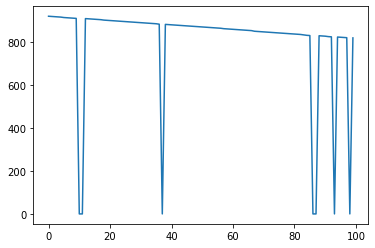

In [10]:
message_data['counter'].plot()

<AxesSubplot:>

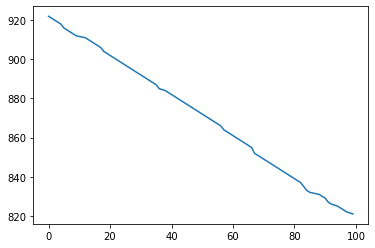

In [11]:
message_data[message_data['action'] == 'reed_counter'].counter.plot()

In [12]:
message_data.index = message_data.created
message_data.index = pd.to_datetime(message_data.index)
message_data

,_id,timestamp,type,seqNumber,deviceId,created,__v,action,battery,counter,mode,temperature,_merge
created,,,,,,,,,,,,,
2021-04-16 12:32:54.405000+00:00,607983f6d131ef466437b4da,1618576373,data_bidir,789,2203AAB,2021-04-16T12:32:54.405Z,0,reed_counter,0,922,reed_counter,0,both
2021-04-16 12:31:50.784000+00:00,607983b6d131ef466437a89d,1618576309,data_bidir,788,2203AAB,2021-04-16T12:31:50.784Z,0,reed_counter,0,921,reed_counter,0,both
2021-04-16 12:10:20.803000+00:00,60797eacd131ef466436d2ed,1618575020,data_bidir,787,2203AAB,2021-04-16T12:10:20.803Z,0,reed_counter,0,920,reed_counter,0,both
2021-04-16 12:08:17.263000+00:00,60797e311ef743213d952c76,1618574896,data_bidir,786,2203AAB,2021-04-16T12:08:17.263Z,0,reed_counter,0,919,reed_counter,0,both
2021-04-16 12:01:07.597000+00:00,60797c83d131ef4664366b07,1618574466,data_bidir,785,2203AAB,2021-04-16T12:01:07.597Z,0,reed_counter,0,918,reed_counter,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-14 15:57:50.110000+00:00,607710fe02ab2e5243ce1e22,1618415869,data_bidir,693,2203AAB,2021-04-14T15:57:50.110Z,0,reed_counter,0,824,reed_counter,0,both
2021-04-14 15:56:48.821000+00:00,607710c04a4e60184ae14fd6,1618415807,data_bidir,692,2203AAB,2021-04-14T15:56:48.821Z,0,reed_counter,0,823,reed_counter,0,both
2021-04-14 15:46:32.275000+00:00,60770e584a4e60184ae0d9c8,1618415191,data_bidir,691,2203AAB,2021-04-14T15:46:32.275Z,0,reed_counter,0,822,reed_counter,0,both


created
2021-04-18 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: W-SUN, Name: counter, dtype: object

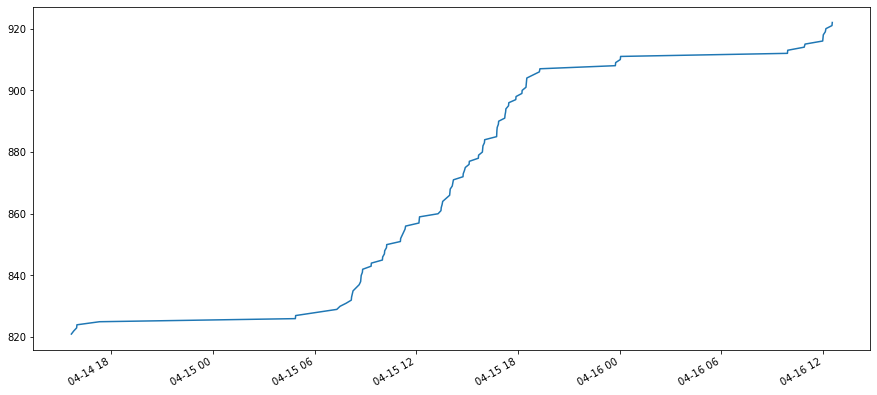

In [13]:
message_data[message_data['action'] == 'reed_counter'].counter.resample('W').plot(figsize=(15,7))

drive api (testing still)

In [14]:
# pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

ModuleNotFoundError: No module named 'pydrive'

In [ ]:
# Rename the downloaded JSON file to client_secrets.json
# The client_secrets.json file needs to be in the same directory as the script.
gauth = GoogleAuth()
drive = GoogleDrive(gauth)
# List files in Google Drive
fileList = drive.ListFile({'q': "'1pxYux33QnFcvrpP17Q88_xY1nW79aJL-' in parents and trashed=false"}).GetList()
# for file1 in fileList:
#   print('title: %s, id: %s' % (file1['title'], file1['id']))

  

In [ ]:
fileCons = list()

for file1 in fileList:
  if 'downloadUrl' in file1:
    fileCons.append(requests.get(file1['downloadUrl']).content)
  else:
    print('unsupported file')

In [ ]:
print(fileCons)